# Battle of Neighborhoods 
#### For finding a best location to start an Asian restaurant in London. 

### Import necessary modules and libraries

In [114]:
import pandas as pd 
import numpy as np

In [115]:
# The code was removed by Watson Studio for sharing.

### 1) Read the "Population by ethinicty" data into a Pandas DataFrame.
Note: I have collected the Ethnic population of only 5 Asian Countries (India, Pakistan, China, Bangladesh and Srilanka) who are living in 33 Boroughs of London

In [116]:
df_popu = pd.read_excel(streaming_body_1)

In [117]:
df_popu.shape

(33, 8)

In [118]:
df_popu.head()

,Area Code,Borough,Year-2012,Year-2013,Year-2014,Year-2015,Year-2016,Year-2017
0,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,40000.0,40000.0,48000.0
2,E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,58000.0
3,E09000004,Bexley,8000.0,7000.0,10000.0,14000.0,18000.0,16000.0
4,E09000005,Brent,109000.0,111000.0,100000.0,109000.0,106000.0,103000.0


#### Note: The data for the borough City of London is NOT AVAILABLE, so I will drop that row from my dataframe

In [119]:
df_popu = df_popu.dropna(how='any')

In [120]:
df_popu.head()

,Area Code,Borough,Year-2012,Year-2013,Year-2014,Year-2015,Year-2016,Year-2017
1,E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,40000.0,40000.0,48000.0
2,E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,58000.0
3,E09000004,Bexley,8000.0,7000.0,10000.0,14000.0,18000.0,16000.0
4,E09000005,Brent,109000.0,111000.0,100000.0,109000.0,106000.0,103000.0
5,E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0


#### Setting the Area Code as Index.

In [121]:
df_popu = df_popu.set_index(['Area Code'])
df_popu.head()

,Borough,Year-2012,Year-2013,Year-2014,Year-2015,Year-2016,Year-2017
Area Code,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,40000.0,40000.0,48000.0
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,58000.0
E09000004,Bexley,8000.0,7000.0,10000.0,14000.0,18000.0,16000.0
E09000005,Brent,109000.0,111000.0,100000.0,109000.0,106000.0,103000.0
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0


#### I have the population data of 6 years from 2012 to 2017, So to get the Current population of the Asians living in London , I will take the average of the existing population.

In [122]:
df_popu['Population'] = df_popu.mean(numeric_only=True, axis=1)

In [123]:
df_popu.head()

,Borough,Year-2012,Year-2013,Year-2014,Year-2015,Year-2016,Year-2017,Population
Area Code,,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,40000.0,40000.0,48000.0,36666.666667
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,58000.0,57000.000000
E09000004,Bexley,8000.0,7000.0,10000.0,14000.0,18000.0,16000.0,12166.666667
E09000005,Brent,109000.0,111000.0,100000.0,109000.0,106000.0,103000.0,106333.333333
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,19666.666667


#### Rounding off the values in Population column.

In [124]:
df_popu.Population = df_popu.Population.round()

In [125]:
df_popu.head()

,Borough,Year-2012,Year-2013,Year-2014,Year-2015,Year-2016,Year-2017,Population
Area Code,,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,40000.0,40000.0,48000.0,36667.0
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,58000.0,57000.0
E09000004,Bexley,8000.0,7000.0,10000.0,14000.0,18000.0,16000.0,12167.0
E09000005,Brent,109000.0,111000.0,100000.0,109000.0,106000.0,103000.0,106333.0
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,19667.0


#### Finding the Borough, that has highest population 

In [126]:
df_popu.loc[df_popu['Population'].idxmax()]

Borough       Newham
Year-2012     143000
Year-2013     146000
Year-2014     143000
Year-2015     125000
Year-2016     142000
Year-2017     143000
Population    140333
Name: E09000025, dtype: object

### As the Newham borough is having highest asian population, we will consider this borough as our preferred location for our asian restuarant.

#### Read the data of Newham borough as a separate DataFrame

In [127]:
df_Newham_asians = df_popu.loc[df_popu['Borough'] == 'Newham']

In [128]:
df_Newham_asians

,Borough,Year-2012,Year-2013,Year-2014,Year-2015,Year-2016,Year-2017,Population
Area Code,,,,,,,,
E09000025,Newham,143000.0,146000.0,143000.0,125000.0,142000.0,143000.0,140333.0


### 2) Read the "Weekly Earnings data of the asian Ethnicity in each borough" into a DataFrame 

In [129]:
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_3 = client_b7d20049bd8143c2944110c6dbbf6031.get_object(Bucket='battleofneighborhoods-donotdelete-pr-iawjsijjjrsgkl', Key='Z03-Earnings-by-borough.xls')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_3, "__iter__"): streaming_body_3.__iter__ = types.MethodType( __iter__, streaming_body_3 ) 



In [130]:
df_earnings = pd.read_excel(streaming_body_3)

In [131]:
df_earnings.shape

(33, 13)

In [132]:
df_earnings.head()

,Area Code,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
0,E09000001,City of London,NaN,762.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,901.6
1,E09000002,Barking and Dagenham,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
2,E09000003,Barnet,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
3,E09000004,Bexley,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
4,E09000005,Brent,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0


#### Drop the row for Borough City of London, as there is no data for most of the years

In [133]:
df_earnings = df_earnings.dropna(how='any')

In [134]:
df_earnings.shape

(32, 13)

In [135]:
df_earnings.head()

,Area Code,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
1,E09000002,Barking and Dagenham,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
2,E09000003,Barnet,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
3,E09000004,Bexley,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
4,E09000005,Brent,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0
5,E09000006,Bromley,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5


#### Setting the Area Code as Index 

In [136]:
df_earnings = df_earnings.set_index(['Area Code'])

In [137]:
df_earnings.head()

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000002,Barking and Dagenham,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
E09000003,Barnet,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
E09000004,Bexley,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
E09000005,Brent,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0
E09000006,Bromley,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5


### As the Newham borough has highest asian population, we will consider the earnings data of only this borough.

#### Read the Earnings data for Newham borough

In [138]:
df_Newham_earnings = df_earnings.loc[df_earnings['Borough'] == 'Newham']

In [139]:
df_Newham_earnings

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000025,Newham,403.0,421.6,422.4,382.5,369.8,387.6,393.7,421.6,436.7,471.3,479.1


### 3) Read the existing "Licensed Restuarants in each borough" data into a DataFrame

In [140]:
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_4 = client_b7d20049bd8143c2944110c6dbbf6031.get_object(Bucket='battleofneighborhoods-donotdelete-pr-iawjsijjjrsgkl', Key='Z04-Licensed-restaurants-by-borough.xls')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_4, "__iter__"): streaming_body_4.__iter__ = types.MethodType( __iter__, streaming_body_4 )

In [141]:
df_lres = pd.read_excel(streaming_body_4)

#### Take only years 2008 to 2018 

In [142]:
df_lres = df_lres.filter(['Area Code', 'Borough', 'Year_2008',
       'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018'], axis=1)

In [143]:
df_lres.columns

Index(['Area Code', 'Borough', 'Year_2008', 'Year_2009', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018'],
      dtype='object')

#### Setting the Area Code as Index

In [144]:
df_lres = df_lres.set_index(['Area Code'])

In [145]:
df_lres.head()

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000001,City of London,185,180,195,190,205,230,255,270,270,295,310
E09000002,Barking and Dagenham,35,30,30,30,40,40,35,45,40,35,40
E09000003,Barnet,195,210,215,205,235,250,240,255,245,270,279
E09000004,Bexley,95,90,95,95,105,105,105,100,110,110,117
E09000005,Brent,140,145,150,155,165,170,165,185,200,190,198


#### Drop the row for City of London, as there is no data of other datasets for this borough 

In [146]:
df_lres = df_lres.drop(['E09000001'])

In [147]:
df_lres.head()

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000002,Barking and Dagenham,35,30,30,30,40,40,35,45,40,35,40
E09000003,Barnet,195,210,215,205,235,250,240,255,245,270,279
E09000004,Bexley,95,90,95,95,105,105,105,100,110,110,117
E09000005,Brent,140,145,150,155,165,170,165,185,200,190,198
E09000006,Bromley,165,170,175,160,180,185,180,180,190,200,208


### As the we have considered Newham borough as our preferred location for our restuarant, we will take the licensed restuarants data of Newham borough only.

#### Read the Newham borough restaurant data.

In [148]:
df_Newham_res = df_lres.loc[df_lres['Borough'] == 'Newham']

In [149]:
df_Newham_res

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000025,Newham,80,75,80,85,95,110,115,120,128,135,146


### 4) Read the "Rated Value per Sqm of the retail space in each borough of London" data into a DataFrame

In [150]:
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_5 = client_b7d20049bd8143c2944110c6dbbf6031.get_object(Bucket='battleofneighborhoods-donotdelete-pr-iawjsijjjrsgkl', Key='Z05-Rated-Value-by-borough.xls')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_5, "__iter__"): streaming_body_5.__iter__ = types.MethodType( __iter__, streaming_body_5 ) 


In [151]:
df_rate = pd.read_excel(streaming_body_5)

In [152]:
df_rate.head()

,Area Code,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
0,E09000001,City of London,340,331,320,460,463,447,420,417,509,509,NaN
1,E09000002,Barking and Dagenham,84,85,85,103,103,105,103,103,137,139,NaN
2,E09000003,Barnet,149,149,148,181,182,184,184,183,239,240,NaN
3,E09000004,Bexley,98,96,96,118,117,116,116,116,137,139,NaN
4,E09000005,Brent,97,96,95,122,124,127,127,128,162,161,NaN


#### Note: These prices are Pounds per Square Metre in each borough, for the retail land space. As I had the Data Set for Retail, Industrial and Other land spaces, I have considered Restuarant Business as a Retail and hence took the Retail data from the dataset.

#### Setting the Area Code as Index 

In [153]:
df_rate = df_rate.set_index(['Area Code'])

In [154]:
df_rate.head()

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000001,City of London,340,331,320,460,463,447,420,417,509,509,NaN
E09000002,Barking and Dagenham,84,85,85,103,103,105,103,103,137,139,NaN
E09000003,Barnet,149,149,148,181,182,184,184,183,239,240,NaN
E09000004,Bexley,98,96,96,118,117,116,116,116,137,139,NaN
E09000005,Brent,97,96,95,122,124,127,127,128,162,161,NaN


#### Note: For Earnings and Restuarants dataframe, I have taken the data of Newham borough, hence for Rated Value also, I will take the data of the same borough.

In [155]:
df_Newham_rv = df_rate.loc[df_rate['Borough'] == 'Newham']

In [156]:
df_Newham_rv

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000025,Newham,100,95,100,126,125,122,121,122,162,161,NaN


### As I have the Rated Value data from 2008 to 2017, I have to predict what will be the rated value in 2018. I will use Linear Regression Machine Learning algorithm to predict the 2018 rated value.
### I am taking the Earnings data and Licensed Restaurants data of "Newham" borough as the Independant Variables (X - variables) and will predict the Rated Value of the same borough and this predicted rated value becomes our Depedant Variable(Y-Variable)

# Machine Learning >>>> start

In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Transpose all the 3 DataFrames - Earnings, Licensed Restaurants and Rated Value

### Earnings DataFrame - Data Cleaning and Preparation

In [158]:
df_Newham_earnings

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000025,Newham,403.0,421.6,422.4,382.5,369.8,387.6,393.7,421.6,436.7,471.3,479.1


#### Round off the data in df_max_earnings dataframe

In [159]:
df_Newham_earnings = df_Newham_earnings.round()

In [160]:
df_Newham_earnings

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000025,Newham,403.0,422.0,422.0,382.0,370.0,388.0,394.0,422.0,437.0,471.0,479.0


#### Transpose the dataframe

In [161]:
df_inp1 = df_Newham_earnings.T.reset_index()

In [162]:
df_inp1.shape

(12, 2)

In [163]:
df_inp1.head()

Area Code,index,E09000025
0,Borough,Newham
1,Year_2008,403
2,Year_2009,422
3,Year_2010,422
4,Year_2011,382


#### Rename the column names to Year and Earnings

In [164]:
df_inp1.rename(columns={'index':'Year', 'E09000025':'Earnings'},inplace=True)

In [165]:
df_inp1.head()

Area Code,Year,Earnings
0,Borough,Newham
1,Year_2008,403
2,Year_2009,422
3,Year_2010,422
4,Year_2011,382


#### Remove the first row and reset the index

In [166]:
df_inp1 = df_inp1.drop([0]).reset_index(drop=True)

In [167]:
df_inp1.shape

(11, 2)

In [168]:
df_inp1.head()

Area Code,Year,Earnings
0,Year_2008,403
1,Year_2009,422
2,Year_2010,422
3,Year_2011,382
4,Year_2012,370


### Licensed Restaurants DataFrame - Data Cleaning and Preparation

In [169]:
df_Newham_res

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000025,Newham,80,75,80,85,95,110,115,120,128,135,146


#### Transpose the dataframe

In [170]:
df_inp2 = df_Newham_res.T.reset_index()

In [171]:
df_inp2.shape

(12, 2)

In [172]:
df_inp2.head()

Area Code,index,E09000025
0,Borough,Newham
1,Year_2008,80
2,Year_2009,75
3,Year_2010,80
4,Year_2011,85


#### Rename the Column Names to Year and No_of_Restuarants

In [173]:
df_inp2.rename(columns={'index':'Year', 'E09000025':'No_of_Restaurants'},inplace=True)

In [174]:
df_inp2.head()

Area Code,Year,No_of_Restaurants
0,Borough,Newham
1,Year_2008,80
2,Year_2009,75
3,Year_2010,80
4,Year_2011,85


#### Remove the first row and reset the index

In [175]:
df_inp2 = df_inp2.drop([0]).reset_index(drop=True)

In [176]:
df_inp2.shape

(11, 2)

In [177]:
df_inp2.head()

Area Code,Year,No_of_Restaurants
0,Year_2008,80
1,Year_2009,75
2,Year_2010,80
3,Year_2011,85
4,Year_2012,95


### Rated Value DataFrame - Data Cleaning and Preparation

In [178]:
df_Newham_rv

,Borough,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
Area Code,,,,,,,,,,,,
E09000025,Newham,100,95,100,126,125,122,121,122,162,161,NaN


#### Transpose the dataframe

In [179]:
df_inp3 = df_Newham_rv.T.reset_index()

In [180]:
df_inp3.shape

(12, 2)

In [181]:
df_inp3.head()

Area Code,index,E09000025
0,Borough,Newham
1,Year_2008,100
2,Year_2009,95
3,Year_2010,100
4,Year_2011,126


#### Rename the Column Names to Year and Rated_Value

In [182]:
df_inp3.rename(columns={'index':'Year', 'E09000025':'Rated_Value'},inplace=True)

In [183]:
df_inp3.head()

Area Code,Year,Rated_Value
0,Borough,Newham
1,Year_2008,100
2,Year_2009,95
3,Year_2010,100
4,Year_2011,126


#### Remove the first row and reset the index

In [184]:
df_inp3 = df_inp3.drop([0]).reset_index(drop=True)

In [185]:
df_inp3.shape

(11, 2)

In [186]:
df_inp3.head()

Area Code,Year,Rated_Value
0,Year_2008,100
1,Year_2009,95
2,Year_2010,100
3,Year_2011,126
4,Year_2012,125


In [187]:
df_inp1.columns

Index(['Year', 'Earnings'], dtype='object', name='Area Code')

In [188]:
df_inp2.columns

Index(['Year', 'No_of_Restaurants'], dtype='object', name='Area Code')

In [189]:
df_inp3.columns

Index(['Year', 'Rated_Value'], dtype='object', name='Area Code')

#### Now Merge all the 3 DataFrames of Earnings, Licensed Restaurants and Rated Value into a new DataFrame

In [190]:
df_one = pd.merge(df_inp1,df_inp2, on='Year')

In [191]:
df_one.shape

(11, 3)

In [192]:
df_one.head()

Area Code,Year,Earnings,No_of_Restaurants
0,Year_2008,403,80
1,Year_2009,422,75
2,Year_2010,422,80
3,Year_2011,382,85
4,Year_2012,370,95


In [193]:
df_final = pd.merge(df_one, df_inp3, on='Year')

In [194]:
df_final.shape

(11, 4)

In [195]:
df_final

Area Code,Year,Earnings,No_of_Restaurants,Rated_Value
0,Year_2008,403,80,100
1,Year_2009,422,75,95
2,Year_2010,422,80,100
3,Year_2011,382,85,126
4,Year_2012,370,95,125
5,Year_2013,388,110,122
6,Year_2014,394,115,121
7,Year_2015,422,120,122
8,Year_2016,437,128,162
9,Year_2017,471,135,161


In [196]:
df_final = df_final.set_index(['Year'])

In [197]:
df_final.shape

(11, 3)

In [198]:
df_final

Area Code,Earnings,No_of_Restaurants,Rated_Value
Year,,,
Year_2008,403,80,100
Year_2009,422,75,95
Year_2010,422,80,100
Year_2011,382,85,126
Year_2012,370,95,125
Year_2013,388,110,122
Year_2014,394,115,121
Year_2015,422,120,122
Year_2016,437,128,162


## Data Exploration

In [199]:
df_final.dtypes

Area Code
Earnings             object
No_of_Restaurants    object
Rated_Value          object
dtype: object

In [200]:
df_final = df_final.apply(pd.to_numeric, errors='coerce')

In [201]:
df_final.describe()

Area Code,Earnings,No_of_Restaurants,Rated_Value
count,11.000000,11.000000,10.000000
mean,417.272727,106.272727,123.400000
std,34.977395,24.682346,23.152634
min,370.000000,75.000000,95.000000
25%,391.000000,82.500000,105.250000
50%,422.000000,110.000000,122.000000
75%,429.500000,124.000000,125.750000
max,479.000000,146.000000,162.000000


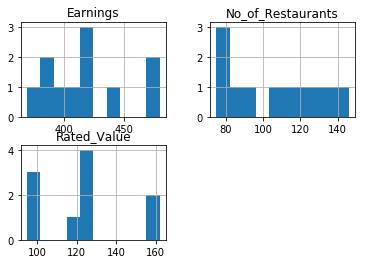

In [202]:
viz = df_final[['Earnings','No_of_Restaurants', 'Rated_Value']]
viz.hist()
plt.show()

# Simple Linear Regression Model
#### Linear Regression fits a linear model with coefficients  θ=(θ1,...,θn)  to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

#### Let us plot a Scatter Plot between these 2 features with the Target variable "Rated Value" 

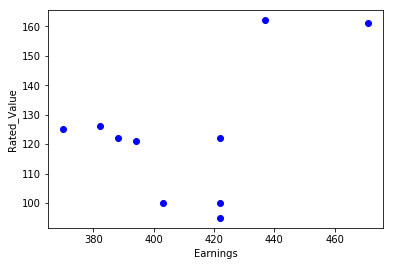

In [203]:
plt.scatter(df_final.Earnings, df_final.Rated_Value, color='blue')
plt.xlabel("Earnings")
plt.ylabel("Rated_Value")
plt.show()

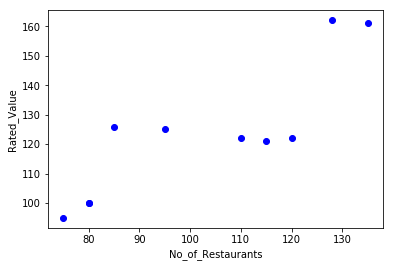

In [204]:
plt.scatter(df_final.No_of_Restaurants, df_final.Rated_Value, color='blue')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")
plt.show()

### Creating train and test dataset

#### As we do not have the Rated Value for the Year 2018 and we need to predict this value using the Simple Linear Regression model, hence we will remove this Year 2018 data from the final dataframe and prepare the Train and Test data from the remaining data

In [205]:
df_final = df_final.drop(['Year_2018'])

In [206]:
df_final.shape

(10, 3)

In [207]:
msk = np.random.rand(len(df_final)) < 0.75
train = df_final[msk]
test = df_final[~msk]

In [208]:
print(train)

Area Code  Earnings  No_of_Restaurants  Rated_Value
Year                                               
Year_2009     422.0                 75         95.0
Year_2010     422.0                 80        100.0
Year_2013     388.0                110        122.0
Year_2016     437.0                128        162.0


In [209]:
print(test)

Area Code  Earnings  No_of_Restaurants  Rated_Value
Year                                               
Year_2008     403.0                 80        100.0
Year_2011     382.0                 85        126.0
Year_2012     370.0                 95        125.0
Year_2014     394.0                115        121.0
Year_2015     422.0                120        122.0
Year_2017     471.0                135        161.0


### Train Data Distribution

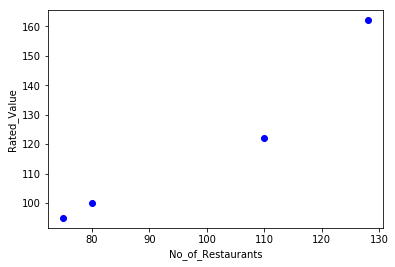

In [210]:
plt.scatter(train.No_of_Restaurants, train.Rated_Value,  color='blue')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")
plt.show()

## Modelling 

In [211]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["No_of_Restaurants"]])
train_y = np.asanyarray(train[["Rated_Value"]])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 1.17002768]]
Intercept:  [ 4.79478055]


## Draw the best fit line (Intercept line) to our train data

Text(0,0.5,'Rated_Value')

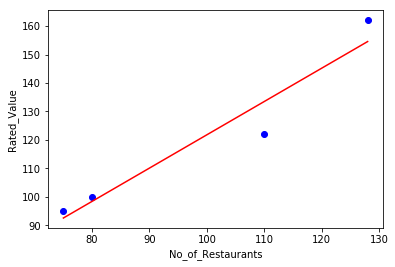

In [212]:
plt.scatter(train.No_of_Restaurants, train.Rated_Value,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")

### Conclusion: By seeing the above Scatter Plot with a best possible fit line, the Rated Value in Newham borough for the year 2018 can be predicted somewhere between 160 to 165

## Evaluation

In [213]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['No_of_Restaurants']])
test_y = np.asanyarray(test[['Rated_Value']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 12.62
Residual sum of squares (MSE): 239.26
R2-score: 0.55


# Machine Learning             <<<<<<< END 

# Segmenting and Clustering Neighborhoods in London City

In [214]:
import requests 
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import folium # map rendering library
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [215]:
# install and import folium library 
!pip -q install folium
import folium 

### 1) Download and Explore the Dataset

#### Read the latitude and longitude coordinates of all Boroughs in London from a Wikipedia link

In [216]:
URL = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

df_list = []
# print(soup)
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data1 = data[0]
    data8 = data[8]    
    try:
        borough_name = data1.get_text()
        borough_name = borough_name.split('[')
        borough_name = borough_name[0]
        borough_name = borough_name.strip()
        
        ll = data8.get_text()
        ll = ll.split('/')
        lat_long = ll[2]
        lat_long = lat_long.split('(')
        lat_long = lat_long[0]
        lat_long = lat_long.split(';')
        latitude = lat_long[0]
        latitude = latitude.strip()
        longitude = lat_long[1]
        longitude = longitude.strip()
        longitude = longitude.replace(u'\ufeff', '')
        latitude = float(latitude)
        longitude = float(longitude)

#       Append the borough name, latitude and logitude in a list
        df_list.append((borough_name, latitude, longitude))
    except IndexError:pass

In [217]:
df_boroughs = pd.DataFrame(df_list, columns=['Borough', 'Latitude' , 'Longitude'])

In [218]:
df_boroughs.shape

(32, 3)

In [219]:
df_boroughs.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [220]:
df_boroughs.dtypes

Borough       object
Latitude     float64
Longitude    float64
dtype: object

In [221]:
df_boroughs.loc[df_boroughs['Borough'] == 'Newham']

,Borough,Latitude,Longitude
23,Newham,51.5077,0.0469


#### Get the Latitude and Longitude of London City using geopy library

In [222]:
address = 'London, UK'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London City are 51.5073219, -0.1276474.


#### Create a map of London with Boroughs superimposed on top.

In [223]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

In [224]:
# add markers to map
for lat, lng, borough in zip(df_boroughs['Latitude'], df_boroughs['Longitude'], df_boroughs['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  

map_london
    

## Preferred location for Asian restuarant - Newham Borough

#### As the borough Newham is having high asian population, we will consider to Segment and Cluster only the neighbourhoods of this borough. For that we have to get the latitude and longitude details of all the areas(neighbourhoods) of Newham borough.

#### Read the latitude and longitude coordinates of all the neighborhoods(areas) in Newham Borough

In [225]:
from urllib.request import urlopen
import re
URL = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

codes = []
areas_list = []
href_links_list = []
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Newham':
        codes.append(code)
        areas_list.append((borough_name,area_name,code))

                
for link in soup.findAll('a', attrs={'href': re.compile("^https://tools.wmflabs.org")}):
            htext = link.text
            if htext in codes:
                hlink = link.get('href')
                href_links_list.append((htext, hlink))

#### Create a DataFrame from the Areas list 

In [226]:
df_areas = pd.DataFrame(areas_list, columns=['Borough', 'Area', 'Code'])

In [227]:
df_areas

,Borough,Area,Code
0,Newham,Beckton,TQ435815
1,Newham,Canning Town,TQ405815
2,Newham,Custom House,TQ408807
3,Newham,East Ham,TQ425835
4,Newham,Forest Gate,TQ405855
5,Newham,Little Ilford,TQ435855
6,Newham,Manor Park,TQ425855
7,Newham,Maryland,TQ391849
8,Newham,North Woolwich,TQ435795
9,Newham,Plaistow,TQ405825


In [228]:
df_areas.columns

Index(['Borough', 'Area', 'Code'], dtype='object')

In [229]:
df_areas.shape

(14, 3)

#### Create a DataFrame from the list of href links

In [230]:
df_links = pd.DataFrame(href_links_list, columns=['Code','href'])

In [231]:
df_links.columns

Index(['Code', 'href'], dtype='object')

In [232]:
df_links.shape

(15, 2)

In [233]:
df_links

,Code,href
0,TQ435815,https://tools.wmflabs.org/os/coor_g/?pagename=...
1,TQ405815,https://tools.wmflabs.org/os/coor_g/?pagename=...
2,TQ408807,https://tools.wmflabs.org/os/coor_g/?pagename=...
3,TQ425835,https://tools.wmflabs.org/os/coor_g/?pagename=...
4,TQ405855,https://tools.wmflabs.org/os/coor_g/?pagename=...
5,TQ435855,https://tools.wmflabs.org/os/coor_g/?pagename=...
6,TQ425855,https://tools.wmflabs.org/os/coor_g/?pagename=...
7,TQ391849,https://tools.wmflabs.org/os/coor_g/?pagename=...
8,TQ435795,https://tools.wmflabs.org/os/coor_g/?pagename=...
9,TQ405825,https://tools.wmflabs.org/os/coor_g/?pagename=...


#### Merge the Areas and href Links DataFrames

In [234]:
cols = df_links.columns.difference(df_areas.columns)

In [235]:
cols

Index(['href'], dtype='object')

In [236]:
df_areas_links = pd.concat([df_areas, df_links[cols]], axis=1)

In [237]:
df_areas_links.shape

(15, 4)

In [238]:
df_areas_links

,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/os/coor_g/?pagename=...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/os/coor_g/?pagename=...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/os/coor_g/?pagename=...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/os/coor_g/?pagename=...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/os/coor_g/?pagename=...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/os/coor_g/?pagename=...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/os/coor_g/?pagename=...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/os/coor_g/?pagename=...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/os/coor_g/?pagename=...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/os/coor_g/?pagename=...


#### Remove the row where there is no data 

In [239]:
df_areas_links = df_areas_links.dropna(how='any')

In [240]:
df_areas_links

,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/os/coor_g/?pagename=...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/os/coor_g/?pagename=...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/os/coor_g/?pagename=...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/os/coor_g/?pagename=...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/os/coor_g/?pagename=...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/os/coor_g/?pagename=...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/os/coor_g/?pagename=...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/os/coor_g/?pagename=...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/os/coor_g/?pagename=...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/os/coor_g/?pagename=...


#### Get the geo co-ordinates for all the areas in the Newham borough

In [241]:
geo_codes = []
for row in df_areas_links.itertuples():
    url = row.href
    code = row.Code
    res = requests.get(url).text
    soup1 = BeautifulSoup(res,'lxml')
    
    for lat in soup1.find('span',{'class':'latitude'}):
        latitude = lat
        latitude = float(latitude)
            
    for long in soup1.find('span',{'class':'longitude'}):    
        longitude = long
        longitude = float(longitude)
        
    geo_codes.append((code, latitude, longitude))

print(geo_codes)    

[('TQ435815', 51.514642, 0.067375), ('TQ405815', 51.515396, 0.024169), ('TQ408807', 51.508133, 0.028171), ('TQ425835', 51.532867, 0.053782), ('TQ405855', 51.551339, 0.025765), ('TQ435855', 51.550584, 0.069004), ('TQ425855', 51.550838, 0.054591), ('TQ391849', 51.546294, 0.005349), ('TQ435795', 51.496671, 0.066561), ('TQ405825', 51.524382, 0.024568), ('TQ415795', 51.497175, 0.037769), ('TQ385845', 51.542847, -0.003456), ('TQ405837', 51.535165, 0.025046), ('TQ405837', 51.535165, 0.025046)]


#### Create a DataFrame from the above list

In [242]:
df_geo_codes = pd.DataFrame(geo_codes, columns=['Code','Latitude','Longitude'])

In [243]:
df_geo_codes

,Code,Latitude,Longitude
0,TQ435815,51.514642,0.067375
1,TQ405815,51.515396,0.024169
2,TQ408807,51.508133,0.028171
3,TQ425835,51.532867,0.053782
4,TQ405855,51.551339,0.025765
5,TQ435855,51.550584,0.069004
6,TQ425855,51.550838,0.054591
7,TQ391849,51.546294,0.005349
8,TQ435795,51.496671,0.066561
9,TQ405825,51.524382,0.024568


#### Now merge the Areas(Neighborhoods) and Geocodes DataFrames

In [244]:
df_areas.columns

Index(['Borough', 'Area', 'Code'], dtype='object')

In [245]:
df_areas.shape

(14, 3)

In [246]:
df_geo_codes.columns

Index(['Code', 'Latitude', 'Longitude'], dtype='object')

In [247]:
df_geo_codes.shape

(14, 3)

In [248]:
cols = df_geo_codes.columns.difference(df_areas.columns)

In [249]:
cols

Index(['Latitude', 'Longitude'], dtype='object')

In [250]:
Newham_borough = pd.concat([df_areas, df_geo_codes[cols]], axis=1)

In [251]:
Newham_borough

,Borough,Area,Code,Latitude,Longitude
0,Newham,Beckton,TQ435815,51.514642,0.067375
1,Newham,Canning Town,TQ405815,51.515396,0.024169
2,Newham,Custom House,TQ408807,51.508133,0.028171
3,Newham,East Ham,TQ425835,51.532867,0.053782
4,Newham,Forest Gate,TQ405855,51.551339,0.025765
5,Newham,Little Ilford,TQ435855,51.550584,0.069004
6,Newham,Manor Park,TQ425855,51.550838,0.054591
7,Newham,Maryland,TQ391849,51.546294,0.005349
8,Newham,North Woolwich,TQ435795,51.496671,0.066561
9,Newham,Plaistow,TQ405825,51.524382,0.024568


#### Change the name of the column 'Area' to 'Neighborhood '

In [252]:
Newham_borough = Newham_borough.rename(columns={'Area' :'Neighborhood'})

#### We do not need the column Code for our further analysis, so we will drop it 

In [253]:
Newham_borough.drop(['Code'], axis=1, inplace=True)

In [254]:
Newham_borough.columns

Index(['Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [255]:
Newham_borough

,Borough,Neighborhood,Latitude,Longitude
0,Newham,Beckton,51.514642,0.067375
1,Newham,Canning Town,51.515396,0.024169
2,Newham,Custom House,51.508133,0.028171
3,Newham,East Ham,51.532867,0.053782
4,Newham,Forest Gate,51.551339,0.025765
5,Newham,Little Ilford,51.550584,0.069004
6,Newham,Manor Park,51.550838,0.054591
7,Newham,Maryland,51.546294,0.005349
8,Newham,North Woolwich,51.496671,0.066561
9,Newham,Plaistow,51.524382,0.024568


In [256]:
Newham_borough.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

#### Now lets get the Coordinates of Newham Borough

In [257]:
address = 'Newham, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Newham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Newham are 51.52999955, 0.0293179602938221.


### Let's Visualize the Areas(Neighborhoods) of Newham Borough

In [258]:
# create map of Manhattan using latitude and longitude values
map_Newham = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Newham_borough['Latitude'], Newham_borough['Longitude'], Newham_borough['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Newham)  
    
map_Newham

#### Define FourSquare Credentials 

In [259]:
CLIENT_ID = '2SOZTXSIXUULTVR1H5IXJJNRWOLETFJ3A1ZUMKN2T4Z30HFG' # your Foursquare ID
CLIENT_SECRET = 'Z2H2BVM2JJH5KX5SWJ2UTFHOKZWBG4ELJ4UWJKAHIZID5MNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2SOZTXSIXUULTVR1H5IXJJNRWOLETFJ3A1ZUMKN2T4Z30HFG
CLIENT_SECRET:Z2H2BVM2JJH5KX5SWJ2UTFHOKZWBG4ELJ4UWJKAHIZID5MNJ


#### Let's explore the first Neighborhood(Area) in Newham Borough

In [260]:
Newham_borough.shape

(14, 4)

In [261]:
Newham_borough.columns

Index(['Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [262]:
Newham_borough.loc[0, 'Neighborhood']

'Beckton'

In [263]:
Newham_borough.loc[0]

Borough           Newham
Neighborhood     Beckton
Latitude         51.5146
Longitude       0.067375
Name: 0, dtype: object

#### Get the Neighborhood's latitude and longitude value 

In [264]:
neighborhood_latitude = Newham_borough.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Newham_borough.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Newham_borough.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Beckton are 51.514642, 0.067375.


#### Now get the top 100 places of Newham Neighborhood within 500KM radius 
#### Create the GET request URL. Name your URL url.

In [265]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret=\
       {}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2SOZTXSIXUULTVR1H5IXJJNRWOLETFJ3A1ZUMKN2T4Z30HFG&client_secret=       Z2H2BVM2JJH5KX5SWJ2UTFHOKZWBG4ELJ4UWJKAHIZID5MNJ&v=20180605&ll=51.514642,0.067375&radius=500&limit=100'

In [266]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c523e13f594df20ee14ce51'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4cd462e4886cb60c1bcb7d89-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d118951735',
         'name': 'Grocery Store',
         'pluralName': 'Grocery Stores',
         'primary': True,
         'shortName': 'Grocery Store'}],
       'id': '4cd462e4886cb60c1bcb7d89',
       'location': {'address': 'Alpine Way (Unit 4C, Beckton Retail Park)',
        'cc': 'GB',
        'city': 'London',
        'country': 'United Kingdom',
        'distance': 367,
        'formattedAddress': ['Alpine Way (Unit 4C, Beckton Retail Park)',
         'London',
         'Greater London',
         'E6 6

#### Extract the Categories of the Venues

In [267]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### We are ready to clean the json and structure it into a pandas dataframe.

In [268]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Lituanica,Grocery Store,51.516442,0.062927
1,Home Bargains,Discount Store,51.517190,0.062754
2,Premier Inn London Beckton,Hotel,51.515017,0.060978
3,Dreams Beckton,Furniture / Home Store,51.516101,0.063028
4,Beckton DLR Station,Light Rail Station,51.514365,0.061460


In [269]:
nearby_venues.shape

(8, 4)

In [270]:
nearby_venues['name'].value_counts()

Dreams Beckton                1
Lituanica                     1
Beckton Retail Park           1
Home Bargains                 1
Matalan                       1
Beckton DLR Station           1
Premier Inn London Beckton    1
Brewers Fayre                 1
Name: name, dtype: int64

#### And how many venues were returned by Foursquare?

In [271]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


### 2) Explore Neighborhoods in Newham Borough

In [272]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called Newham venues

In [273]:
Newham_venues = getNearbyVenues(names=Newham_borough['Neighborhood'],
                                   latitudes=Newham_borough['Latitude'],
                                   longitudes=Newham_borough['Longitude']
                                  )

Beckton
Canning Town
Custom House
East Ham
Forest Gate
Little Ilford
Manor Park
Maryland
North Woolwich
Plaistow
Silvertown
Stratford
Upton Park
West Ham


In [274]:
Newham_venues.shape

(208, 7)

In [275]:
Newham_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckton,51.514642,0.067375,Lituanica,51.516442,0.062927,Grocery Store
1,Beckton,51.514642,0.067375,Home Bargains,51.517190,0.062754,Discount Store
2,Beckton,51.514642,0.067375,Premier Inn London Beckton,51.515017,0.060978,Hotel
3,Beckton,51.514642,0.067375,Dreams Beckton,51.516101,0.063028,Furniture / Home Store
4,Beckton,51.514642,0.067375,Beckton DLR Station,51.514365,0.061460,Light Rail Station


#### Let's check how many venues were returned for each neighborhood

In [276]:
Newham_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beckton,8,8,8,8,8,8
Canning Town,4,4,4,4,4,4
Custom House,26,26,26,26,26,26
East Ham,20,20,20,20,20,20
Forest Gate,9,9,9,9,9,9
Little Ilford,4,4,4,4,4,4
Manor Park,4,4,4,4,4,4
Maryland,22,22,22,22,22,22
North Woolwich,18,18,18,18,18,18


#### Let's find out how many unique categories can be curated from all the returned venues  

In [277]:
print('There are {} uniques categories.'.format(len(Newham_venues['Venue Category'].unique())))

There are 95 uniques categories.


## 3) Analyze Each Neighborhood in Newham borough

In [278]:
# one hot encoding
Newham_onehot = pd.get_dummies(Newham_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Newham_onehot['Neighborhood'] = Newham_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Newham_onehot.columns[-1]] + list(Newham_onehot.columns[:-1])
Newham_onehot = Newham_onehot[fixed_columns]

Newham_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Art Gallery,Asian Restaurant,Bagel Shop,Bakery,Bar,Boat or Ferry,Bookstore,...,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Warehouse Store,Wine Bar
0,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
Newham_onehot.shape

(208, 96)

#### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [280]:
Newham_grouped = Newham_onehot.groupby('Neighborhood').mean().reset_index()
Newham_grouped

,Neighborhood,Accessories Store,American Restaurant,Art Gallery,Asian Restaurant,Bagel Shop,Bakery,Bar,Boat or Ferry,Bookstore,...,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Warehouse Store,Wine Bar
0,Beckton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Canning Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.25,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Custom House,0.000000,0.038462,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,...,0.038462,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.038462
3,East Ham,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.050000,...,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.05,0.050000,0.000000
4,Forest Gate,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000,0.000000,0.111111,0.000000,0.00,0.000000,0.000000
5,Little Ilford,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Manor Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000
7,Maryland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,North Woolwich,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,...,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.055556,0.00,0.000000,0.000000
9,Plaistow,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [281]:
Newham_grouped.columns

Index(['Neighborhood', 'Accessories Store', 'American Restaurant',
       'Art Gallery', 'Asian Restaurant', 'Bagel Shop', 'Bakery', 'Bar',
       'Boat or Ferry', 'Bookstore', 'Boutique', 'Brewery', 'Bridal Shop',
       'Bridge', 'Bubble Tea Shop', 'Burger Joint', 'Bus Line', 'Bus Stop',
       'Café', 'Chinese Restaurant', 'Clothing Store', 'Coffee Shop',
       'Construction & Landscaping', 'Convenience Store', 'Cosmetics Shop',
       'Creperie', 'Dance Studio', 'Department Store', 'Dessert Shop',
       'Discount Store', 'Doner Restaurant', 'Eastern European Restaurant',
       'Electronics Store', 'English Restaurant', 'Fast Food Restaurant',
       'Food Court', 'Fried Chicken Joint', 'Furniture / Home Store',
       'Gas Station', 'General Entertainment', 'Gift Shop', 'Go Kart Track',
       'Greek Restaurant', 'Grocery Store', 'Gym / Fitness Center', 'Gym Pool',
       'History Museum', 'Hotel', 'Hotel Bar', 'Ice Cream Shop',
       'Indian Restaurant', 'Indie Movie Theater',

In [282]:
Newham_grouped.shape

(14, 96)

#### Let's print each neighborhood along with the top 5 most common venues

In [283]:
num_top_venues = 5
for hood in Newham_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Newham_grouped[Newham_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beckton----
                    venue  freq
0          Discount Store  0.12
1  Furniture / Home Store  0.12
2                   Hotel  0.12
3                     Pub  0.12
4      Light Rail Station  0.12


----Canning Town----
                      venue  freq
0               Gas Station  0.25
1         Convenience Store  0.25
2                      Park  0.25
3              Tennis Court  0.25
4  Mediterranean Restaurant  0.00


----Custom House----
                 venue  freq
0                Hotel  0.19
1                  Pub  0.08
2            Hotel Bar  0.04
3  Japanese Restaurant  0.04
4    Convenience Store  0.04


----East Ham----
                  venue  freq
0        Clothing Store  0.10
1  Fast Food Restaurant  0.10
2         Grocery Store  0.05
3              Gym Pool  0.05
4         Shopping Mall  0.05


----Forest Gate----
                venue  freq
0       Grocery Store  0.22
1  Italian Restaurant  0.11
2                 Pub  0.11
3              Bakery  0.11
4      

#### Let's put that into a pandas dataframe
#### First, let's write a function to sort the venues in descending order.

In [284]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [285]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Newham_grouped['Neighborhood']

for ind in np.arange(Newham_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Newham_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Furniture / Home Store,Clothing Store,Pub,Discount Store,Light Rail Station,Shopping Plaza,Grocery Store,General Entertainment,Eastern European Restaurant
1,Canning Town,Convenience Store,Tennis Court,Gas Station,Park,Greek Restaurant,Go Kart Track,Creperie,Dance Studio,Department Store,Dessert Shop
2,Custom House,Hotel,Pub,Wine Bar,English Restaurant,Light Rail Station,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,Convenience Store,Salad Place
3,East Ham,Fast Food Restaurant,Clothing Store,Park,Sporting Goods Shop,Pub,Sandwich Place,Café,Chinese Restaurant,Shopping Mall,Grocery Store
4,Forest Gate,Grocery Store,Train Station,Moving Target,Bakery,Italian Restaurant,Pub,Café,Fast Food Restaurant,Wine Bar,Electronics Store
5,Little Ilford,Fried Chicken Joint,Ice Cream Shop,Indian Restaurant,Grocery Store,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Discount Store,Doner Restaurant
6,Manor Park,Turkish Restaurant,Gym / Fitness Center,Indian Restaurant,Restaurant,Wine Bar,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Discount Store
7,Maryland,Hotel,Pub,Bus Stop,Grocery Store,Supermarket,Liquor Store,Portuguese Restaurant,Café,Sculpture Garden,Dance Studio
8,North Woolwich,Pier,History Museum,Clothing Store,Scenic Lookout,Gym / Fitness Center,Hotel,Italian Restaurant,Outdoor Sculpture,Pharmacy,Chinese Restaurant
9,Plaistow,Park,Café,Gym / Fitness Center,Indian Restaurant,Grocery Store,Bus Stop,English Restaurant,Dance Studio,Department Store,Dessert Shop


### 4) Cluster the Neighborhoods

### Run K-means algorithm to cluster the neighborhood into 5 clusters.

In [286]:
# set number of clusters
kclusters = 5

Newham_grouped_clustering = Newham_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Newham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 3, 4, 1, 1, 0], dtype=int32)

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [287]:
Newham_merged = Newham_borough

# add clustering labels
Newham_merged['Cluster Labels'] = kmeans.labels_

# merge Neighborhoods dataframe with Newham borough dataframe to add latitude/longitude for each neighborhood
Newham_merged = Newham_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Newham_merged.head() # check the last columns!


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newham,Beckton,51.514642,0.067375,1,Hotel,Furniture / Home Store,Clothing Store,Pub,Discount Store,Light Rail Station,Shopping Plaza,Grocery Store,General Entertainment,Eastern European Restaurant
1,Newham,Canning Town,51.515396,0.024169,0,Convenience Store,Tennis Court,Gas Station,Park,Greek Restaurant,Go Kart Track,Creperie,Dance Studio,Department Store,Dessert Shop
2,Newham,Custom House,51.508133,0.028171,1,Hotel,Pub,Wine Bar,English Restaurant,Light Rail Station,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,Convenience Store,Salad Place
3,Newham,East Ham,51.532867,0.053782,1,Fast Food Restaurant,Clothing Store,Park,Sporting Goods Shop,Pub,Sandwich Place,Café,Chinese Restaurant,Shopping Mall,Grocery Store
4,Newham,Forest Gate,51.551339,0.025765,1,Grocery Store,Train Station,Moving Target,Bakery,Italian Restaurant,Pub,Café,Fast Food Restaurant,Wine Bar,Electronics Store


#### Let's Visualize the Cluster 

In [288]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Newham_merged['Latitude'], Newham_merged['Longitude'], Newham_merged['Neighborhood'], Newham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5) Examine the Clusters

In [289]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 0, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canning Town,Convenience Store,Tennis Court,Gas Station,Park,Greek Restaurant,Go Kart Track,Creperie,Dance Studio,Department Store,Dessert Shop
9,Plaistow,Park,Café,Gym / Fitness Center,Indian Restaurant,Grocery Store,Bus Stop,English Restaurant,Dance Studio,Department Store,Dessert Shop
10,Silvertown,Gym / Fitness Center,Theater,Construction & Landscaping,Museum,Café,Park,Paintball Field,Go Kart Track,General Entertainment,Discount Store


In [290]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 1, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Furniture / Home Store,Clothing Store,Pub,Discount Store,Light Rail Station,Shopping Plaza,Grocery Store,General Entertainment,Eastern European Restaurant
2,Custom House,Hotel,Pub,Wine Bar,English Restaurant,Light Rail Station,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,Convenience Store,Salad Place
3,East Ham,Fast Food Restaurant,Clothing Store,Park,Sporting Goods Shop,Pub,Sandwich Place,Café,Chinese Restaurant,Shopping Mall,Grocery Store
4,Forest Gate,Grocery Store,Train Station,Moving Target,Bakery,Italian Restaurant,Pub,Café,Fast Food Restaurant,Wine Bar,Electronics Store
7,Maryland,Hotel,Pub,Bus Stop,Grocery Store,Supermarket,Liquor Store,Portuguese Restaurant,Café,Sculpture Garden,Dance Studio
8,North Woolwich,Pier,History Museum,Clothing Store,Scenic Lookout,Gym / Fitness Center,Hotel,Italian Restaurant,Outdoor Sculpture,Pharmacy,Chinese Restaurant
11,Stratford,Pub,Sandwich Place,Café,Cosmetics Shop,Pizza Place,Bookstore,Burger Joint,Bar,Coffee Shop,Toy / Game Store


In [291]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 2, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Upton Park,Convenience Store,Pub,Bus Stop,Boutique,Bus Line,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Doner Restaurant
13,West Ham,Convenience Store,Pub,Bus Stop,Boutique,Bus Line,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Doner Restaurant


In [292]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 3, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Little Ilford,Fried Chicken Joint,Ice Cream Shop,Indian Restaurant,Grocery Store,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Discount Store,Doner Restaurant


In [293]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 4, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Manor Park,Turkish Restaurant,Gym / Fitness Center,Indian Restaurant,Restaurant,Wine Bar,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Discount Store


### Conclusion: After examining the above 5 clusters, we can recommend our stakeholders that Beckton,Custom House, Maryland, Eastham and Manor Park are the best neighborhoods in Newham borough, to open their asian restuarant. This is because in these areas, the most common venue visited by the public is the hotel and as these areas are highly populated with asians, opening an asian restuarant would definitley be a good idea.